# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model/'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_noemlines.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summ_noemlines.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

# Posteriors

In [5]:
posteriors

,beta[1],beta[2],beta[3],beta[4],beta[5]
0,-3.852561,31.320144,-54.570088,-0.241542,0.027604
1,-2.643732,21.550421,-43.406740,0.108431,-0.027846
2,-3.657296,34.043053,-80.041015,0.208001,0.093407
3,-3.686843,34.060278,-81.506544,0.205566,0.093367
4,-3.577956,29.016170,-61.772592,0.048834,0.240327
5,-3.616091,28.670355,-59.692381,0.053644,0.230531
6,-3.339242,26.076218,-52.989953,-0.006617,0.228855
7,-3.396142,28.471518,-62.598569,0.019973,0.190452
8,-3.811518,32.105438,-69.457119,0.107693,0.155250
9,-3.862695,34.853297,-82.515429,0.125839,0.114830


In [6]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [8]:
# dimensions = posteriors.columns.values.reshape(5,5)
# rows       = dimensions[:,0].size
# columns    = dimensions[0,:].size

In [10]:
# plt.subplots(figsize=figsize)
# position = 1
# for each_beta in range(rows):
#     for each_class in range(columns):
#         name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
#         plot_temp = plt.subplot(rows, columns, position)
#         sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
#         plt.legend(loc='upper right', fontsize=15)
#         plt.axvline(x=0, linestyle="--", color='black')
#         plt.xlabel(r"%s" % str(name_temp), fontsize=20)
#         plt.tick_params('both', labelsize='20')
#         plt.xlim([-1.5,1.5])
#         plt.ylim([0,4.5])      
#         if (each_class==0):
#             plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
#         elif (each_class!=0): 
#             plot_temp.yaxis.set_visible(False)            
#         position+=1

# plt.tight_layout()
# plt.savefig(os.path.join(results_path, '25betas_shared_revised.png'), bbox_inch='tight')
# plt.savefig(os.path.join(results_path, '25betas_shared_revised.pdf'), bbox_inch='tight')
# plt.show()

# Simplifying the probabilities' dataframe

In [11]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_noemlines.csv'))

In [12]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1]', 'beta[2]', 'beta[3]', 'beta[4]',
       'beta[5]', 'eta[1]', 'eta[2]',
       ...
       'pnew[898]', 'pnew[899]', 'pnew[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=2319)

In [29]:
header = np.array(entire_fit.keys())
header

array(['chain', 'draw', 'warmup', ..., 'n_leapfrog__', 'divergent__',
       'energy__'], dtype=object)

In [31]:
# entire_fit

In [14]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [15]:
probabilities = entire_fit[prob_keys]

In [16]:
probabilities

""
0
1
2
3
4
5
6
7
8
9


In [32]:
probabilities_transposed = probabilities.T

In [33]:
print(probabilities_transposed.columns)

RangeIndex(start=0, stop=9000, step=1)


In [34]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

9000


In [35]:
probabilities_transposed.columns = new_header

In [36]:
probabilities_transposed

,itr0,itr1,itr2,itr3,itr4,itr5,itr6,itr7,itr8,itr9,...,itr8990,itr8991,itr8992,itr8993,itr8994,itr8995,itr8996,itr8997,itr8998,itr8999


In [37]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [39]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
        print(shrinked_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
        print(shrinked_temp)
shrinked_df = shrinked_temp.T
shrinked_df

NameError: name 'shrinked_temp' is not defined

In [ ]:
print(shrinked_df.values.shape, parameters.shape)

In [ ]:
loc = shrinked_df.iloc[0, :].size
print(loc)

In [ ]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [ ]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [ ]:
shrinked_df

In [ ]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'))

In [ ]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [ ]:
zu = np.unique(prob01['LOG_STELLAR_MASS'].values)

In [ ]:
subset = prob01[prob01['LOG_STELLAR_MASS'].values==zu[6]]

In [ ]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,0.5])
plt.show()

In [ ]:
np.unique(prob01['Z'].values)

In [ ]:
subset = prob01[prob01['Z']<0.07]

In [ ]:
subset

In [ ]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [40]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summ_noemlines.csv'))

In [41]:
summary_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,pnew[1],0.2800,0.0016,0.1166,0.0941,0.1934,0.2678,0.3519,0.5401,5073,1.0004,0.067940,9.729482
1,pnew[2],0.3160,0.0019,0.1265,0.1081,0.2219,0.3041,0.3972,0.5920,4491,1.0003,0.077608,9.729482
2,pnew[3],0.3519,0.0022,0.1364,0.1208,0.2514,0.3421,0.4430,0.6415,3998,1.0002,0.087275,9.729482
3,pnew[4],0.3869,0.0024,0.1458,0.1336,0.2806,0.3796,0.4866,0.6857,3614,1.0002,0.096943,9.729482
4,pnew[5],0.4203,0.0027,0.1543,0.1452,0.3070,0.4147,0.5295,0.7284,3325,1.0001,0.106610,9.729482
5,pnew[6],0.4516,0.0029,0.1618,0.1560,0.3332,0.4482,0.5684,0.7636,3111,1.0001,0.116278,9.729482
6,pnew[7],0.4803,0.0031,0.1681,0.1653,0.3577,0.4805,0.6037,0.7952,2951,1.0001,0.125946,9.729482
7,pnew[8],0.5064,0.0033,0.1733,0.1741,0.3806,0.5097,0.6362,0.8204,2833,1.0000,0.135613,9.729482
8,pnew[9],0.5297,0.0034,0.1775,0.1832,0.4026,0.5365,0.6637,0.8430,2746,1.0000,0.145281,9.729482
9,pnew[10],0.5502,0.0035,0.1807,0.1906,0.4214,0.5603,0.6881,0.8613,2682,1.0000,0.154948,9.729482


In [42]:
np.unique(summary_stan['LOG_STELLAR_MASS'].values)

array([ 9.729482  ,  9.79669193,  9.86390186,  9.93111179,  9.99832172,
       10.06553166, 10.13274159, 10.19995152, 10.26716145, 10.33437138,
       10.40158131, 10.46879124, 10.53600117, 10.6032111 , 10.67042103,
       10.73763097, 10.8048409 , 10.87205083, 10.93926076, 11.00647069,
       11.07368062, 11.14089055, 11.20810048, 11.27531041, 11.34252034,
       11.40973028, 11.47694021, 11.54415014, 11.61136007, 11.67857   ])

In [43]:
chosen_mass = np.unique(summary_stan['LOG_STELLAR_MASS'].values)[25]

In [44]:
chosen_mass

11.409730275862069

In [45]:
subset_temp = summary_stan[summary_stan['LOG_STELLAR_MASS']==chosen_mass]

In [46]:
# subset_temp

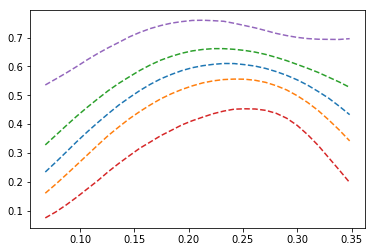

In [47]:
plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
plt.show()

In [48]:
np.unique(summary_stan['Z'].values)

array([0.06794   , 0.07760759, 0.08727517, 0.09694276, 0.10661034,
       0.11627793, 0.12594552, 0.1356131 , 0.14528069, 0.15494828,
       0.16461586, 0.17428345, 0.18395103, 0.19361862, 0.20328621,
       0.21295379, 0.22262138, 0.23228897, 0.24195655, 0.25162414,
       0.26129172, 0.27095931, 0.2806269 , 0.29029448, 0.29996207,
       0.30962966, 0.31929724, 0.32896483, 0.33863241, 0.3483    ])

In [49]:
chosen_z = np.unique(summary_stan['Z'].values)[5]

In [50]:
chosen_z

0.11627793103448275

In [51]:
subset_temp = summary_stan[summary_stan['Z']==chosen_z]

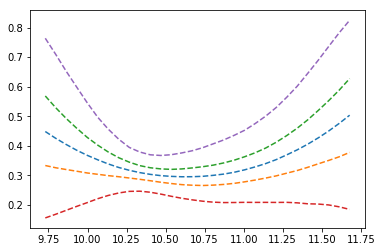

In [52]:
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['50%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['25%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['75%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['97.5%'], '--')
plt.show()

In [53]:
# %matplotlib notebook

NameError: name 'prob01_stan' is not defined

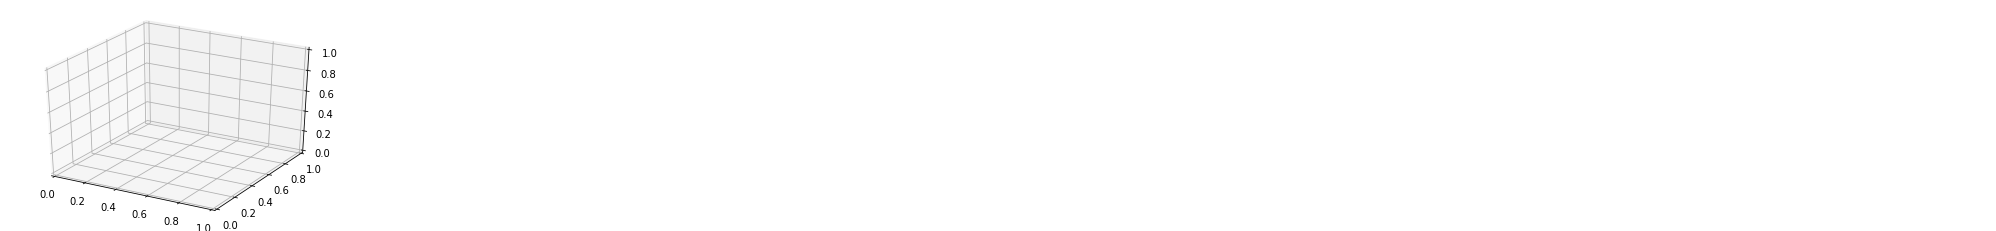

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
plt.show()

In [ ]:
prob01.boxplot(column='50%')

In [ ]:
prob01_stan.boxplot(column='50%')

# Last check to be 100% sure (for one class - class 1 - lineless)

In [55]:
m = 0.01
z = np.arange(0., 0.35, 0.01)
p = posteriors

In [56]:
# regression = []
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))
        
        
        
        
        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

KeyError: 'beta[1,1]'

In [58]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

NameError: name 'regression' is not defined

In [ ]:
idx = np.where(beta<=10)

In [57]:
plt.plot(redsh[idx], prob[idx], '-', alpha=0.8)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()

NameError: name 'redsh' is not defined